<a href="https://colab.research.google.com/github/pankajr141/audio_experiments/blob/master/Sound_101_Generating_and_Playing_sound_waves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import wave
import struct
import matplotlib.pyplot as plt
import IPython

https://www.pythonforengineers.com/audio-and-digital-signal-processingdsp-in-python/

### Generating a Sine Wave

In [0]:
# frequency is the number of times a wave repeats a second
frequency = 1000
num_samples = 48000

# The sampling rate of the analog to digital convert 
sampling_rate = 48000.0
amplitude = 16000

In [0]:
sine_wave = [np.sin(2 * np.pi * frequency * x/sampling_rate) for x in range(num_samples)]

# This says that for each x that we generated, run it through the formula for the sine wave,  2 * pi * f * t

In [0]:
audiofile = "test.wav"

nframes=num_samples
comptype="NONE"
compname="not compressed"
nchannels=1
sampwidth=2

wav_file=wave.open(audiofile, 'w') 
wav_file.setparams((nchannels, sampwidth, int(sampling_rate), nframes, comptype, compname))

#Struct is a Python library that takes our data and packs it as binary data. The h in the code means 16 bit number.
for s in sine_wave:
   wav_file.writeframes(struct.pack('h', int(s*amplitude)))
wav_file.close()

In [0]:
IPython.display.Audio(audiofile)

### Fourier Transform

In its simplest terms, the DFT takes a signal and calculates which frequencies are present in it

In [0]:
# frame_rate = 48000.0
audiofile = "test.wav"
num_samples = 48000
wav_file = wave.open(audiofile, 'r')
data = wav_file.readframes(num_samples)
wav_file.close()

data = struct.unpack('{n}h'.format(n=num_samples), data)
data = np.array(data)
# Fast Fourier Transform
data_fft = np.fft.fft(data)
# Above value is in complex number but we want absolute number
# This will give us the frequency we want
frequencies = np.abs(data_fft)

In [0]:
frequencies.shape
print("data_fft shape:", data_fft.shape)
print("frequencies 0:", frequencies[1])         # will contain frequency part of 1 Hz.
print("frequencies 1:", frequencies[2])         # will contain frequency part of 2 Hz.
print("frequencies 1000:", frequencies[1000])   # will contain frequency part of 1000 Hz.
print("frequencies 1001:", frequencies[1001])   # will contain frequency part of 1001 Hz.
print("frequencies 999:", frequencies[999])     # will contain frequency part of 999 Hz.

print("The frequency is {} Hz".format(np.argmax(frequencies)))
# Now since we have created a 1000Hz signal so value is maximum at 1000, other is just a tiny bit.

data_fft shape: (48000,)
frequencies 0: 9.58985517018681
frequencies 1: 13.51116536576921
frequencies 1000: 383987426.14432806
frequencies 1001: 14.137507545266926
frequencies 999: 13.46387573851014
The frequency is 1000 Hz


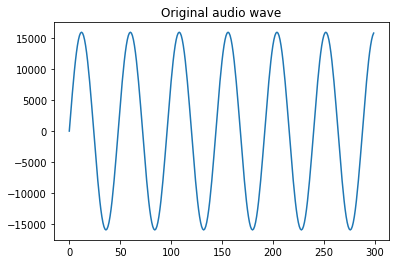

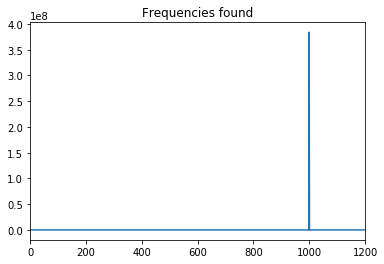

In [0]:
plt.title("Original audio wave")
plt.plot(data[:300])
plt.show()

plt.title("Frequencies found")
plt.plot(frequencies)
plt.xlim(0, 1200)
plt.show()

### Cleaning a noisy sine wave

In [0]:
# frequency is the number of times a wave repeats a second
frequency = 1000
noisy_freq = 50
num_samples = 48000

# The sampling rate of the analog to digital convert
sampling_rate = 48000.0

In [0]:
#Create the sine wave and noise

sine_wave = [np.sin(2 * np.pi * frequency * x1 / sampling_rate) for x1 in range(num_samples)]
sine_noise = [np.sin(2 * np.pi * noisy_freq * x1/  sampling_rate) for x1 in range(num_samples)]

#Convert them to numpy arrays
sine_wave = np.array(sine_wave)
sine_noise = np.array(sine_noise)
combined_signal = sine_wave + sine_noise

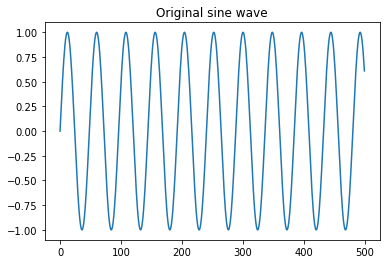

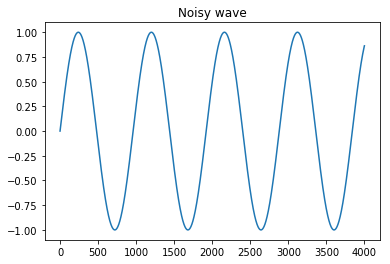

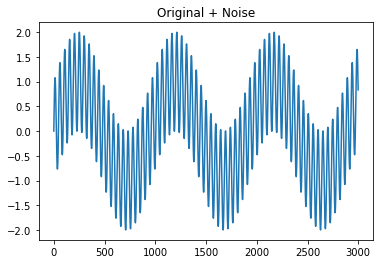

In [0]:
plt.title("Original sine wave")
plt.plot(sine_wave[:500])
plt.show()

plt.title("Noisy wave")
plt.plot(sine_noise[:4000])
plt.show()

plt.title("Original + Noise")
plt.plot(combined_signal[:3000]) 
plt.show()

(0, 1200)

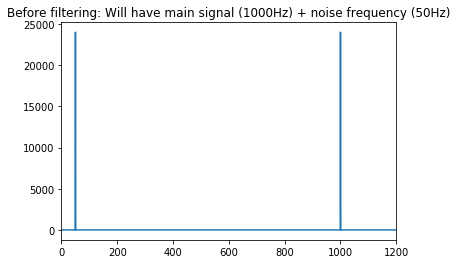

In [0]:
data_fft = np.fft.fft(combined_signal)
freq = (np.abs(data_fft[:len(data_fft)]))

plt.title("Before filtering: Will have main signal (1000Hz) + noise frequency (50Hz)")
plt.plot(freq) 
plt.xlim(0,1200)

#This time, we get two signals: Our sine wave at 1000Hz and the noise at 50Hz.

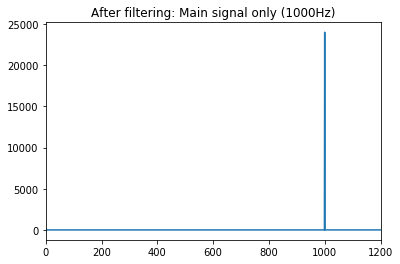

In [0]:
filtered_freq = [f if (950 < index < 1050 and f > 1) else 0 for index, f in enumerate(freq)]

plt.title("After filtering: Main signal only (1000Hz)")
plt.plot(filtered_freq)
plt.xlim(0,1200)
plt.show()
plt.close()

In [0]:
recovered_signal = np.fft.ifft(filtered_freq)

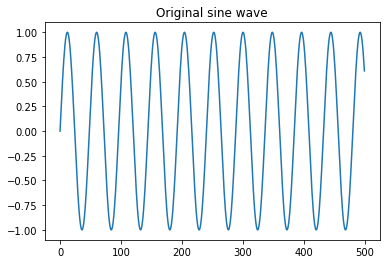

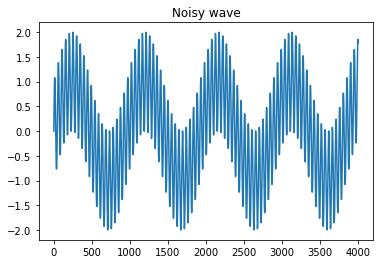

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


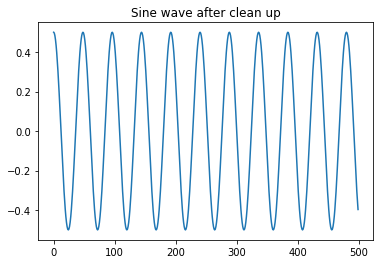

In [0]:
plt.title("Original sine wave") 
plt.plot(sine_wave[:500])
plt.show()

plt.title("Noisy wave") 
plt.plot(combined_signal[:4000])
plt.show()

plt.title("Sine wave after clean up") 
plt.plot((recovered_signal[:500]))
plt.show()